In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload files from your computer


Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv('Google_Stock_Price_Train.csv')
df.head(2)



,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"


In [ ]:
train = df.iloc[:,1:2].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_scaled = sc.fit_transform(train)

In [ ]:
train.shape

(1258, 1)

In [ ]:
x_train = []
y_train = []

for i in range(60,1258):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

**Building and Training The RNN**


**Importing Libraries and Packages**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

Adding first LSTM layer and Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Adding Secound LSTM layer and dropout regularization

In [ ]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

Adding THird LSTM layer and some Dropout regularisation


In [ ]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

Adding the fourthLSTM layer and some DropOUT regularization


In [ ]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

Adding the output Layer

In [ ]:
regressor.add(Dense(units = 1))

Compiling the Rnn

In [ ]:
regressor.compile(optimizer="adam",loss="mean_squared_error")

Fitting the Rnn to the training set

In [ ]:
regressor.fit(x_train,y_train,epochs = 100,batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0806
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0062
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0057
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0062
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0061
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0053
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0045
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0049
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0050
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0043
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0048
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0043
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0042
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0044
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - lo

In [ ]:
pred = regressor.predict(x_train)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


Evaluating the RNN

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_train,pred))
rmse

0.029113122317179427

Making the predictions and visualising the results

Getting the real stock price of 2017

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [ ]:
df_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock = price = df_test.iloc[:,1:2].values

In [ ]:
data_total = pd.concat((df["Open"],df_test["Open"]),axis=0)
inputs = data_total[len(data_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Visualizing the results

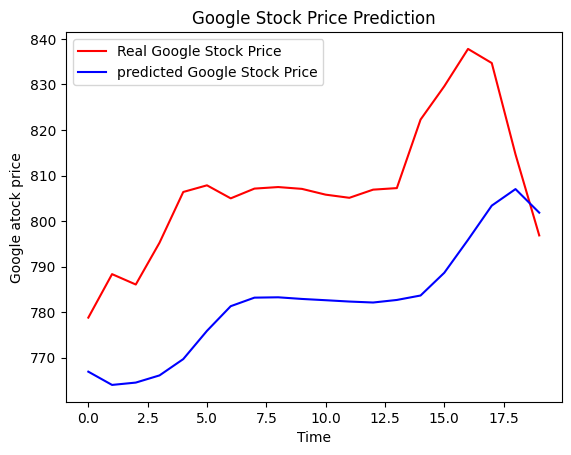

In [ ]:
plt.plot(real_stock,color = "red",label = "Real Google Stock Price")
plt.plot(predicted_stock_price,color = "blue",label = "predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google atock price")
plt.legend()
plt.show()
